## Plotting the variant of a certain SNP in each sample on the plane AO-CAG

In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

In [2]:
from data_loading import read_sparse_X

In [3]:
# Change working directory
os.chdir('/media/HDD_4TB_1/jordi/cfuses_gnn_enrollhd_2024/')

# Data directory
data_dir = "data/features/"

# Input files
# X_path = data_dir + "X_pc10_filt_0.01.txt"
# y_path = data_dir + "y_pc10.txt"
X_path = data_dir + "feature_matrix_m3_filt_0.01.txt"
y_path = data_dir + "aoo.txt"

# Results directory
results_dir = "data/ml_results/SNP_AOvsCAG/"

In [4]:
# Load X matrix
X = read_sparse_X(X_path, chunk_size = 100)

# Load outcome vector
y = np.loadtxt(y_path, delimiter='\t', usecols=[1], skiprows=1)

In [5]:
CAG = X[:, 1]
CAG = CAG.toarray().reshape(-1, 1)

In [6]:
# Find unique values of CAG and corresponding indices
unique_CAG, indices = np.unique(CAG, return_inverse=True)

# Calculate mean of y for each unique value of CAG
y_means = np.bincount(indices, weights=y) / np.bincount(indices)

# Create x_unique containing the unique values of CAG
x_unique = unique_CAG

In [9]:
# Extract feature matrix header
with open(X_path, "r") as file:
    header = file.readline().strip().split("\t")
        
feature_names = header[1:] # when the feature matrix is loaded we don't take the first column

In [20]:
def variant_AOvsCAG(SNP2represent, gene, feature_names, samples2plot = 500):    
    
    # Find index in header corresponding to the SNP to represent
    SNPpos = feature_names.index(SNP2represent)

    # Extract the genotypes of the SNP to represent
    SNPvariant = X[:, SNPpos]
    SNPvariant = SNPvariant.toarray().reshape(-1, 1)

    # Select x random samples
    sample_indices = np.random.choice(SNPvariant.shape[0], samples2plot, replace=False)
    SNPvariant_sampled = SNPvariant[sample_indices]
    CAG_sampled = CAG[sample_indices]
    y_sampled = y[sample_indices]

    # Create figure and axis
    fig, ax = plt.subplots(dpi=300)
    
    # Separate data based on SNPvariant values
    grey_mask = (SNPvariant_sampled == 0).flatten()
    black_mask = ~grey_mask

    # Plot grey dots first
    ax.scatter(CAG_sampled[grey_mask], y_sampled[grey_mask], c='lightgray', alpha = 0.6, s=20, zorder=1)

    # Plot black dots on top
    ax.scatter(CAG_sampled[black_mask], y_sampled[black_mask], c='black', s=20, zorder=2)


    # ax.scatter(CAG, y, c=SNPvariant, cmap=cmap, alpha=0.3, zorder=1)

    # Plot a line representing the mean for each value of x
    ax.plot(x_unique, y_means, color='black', linestyle='-', zorder=2)

    # Add labels and title
    ax.set_xlabel('CAG repeat length')
    ax.set_ylabel('Age of Onset')
    ax.set_title('AO over CAG colored by {} ({}) genotype'.format(SNP2represent, gene))

    # Plot grid below the points
    ax.set_axisbelow(True)
    ax.grid(True)

    # Add legend
    legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgray', alpha = 0.6, markersize=8, label='Reference variant'),
                       Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=8, label='Alternative variant')]
    ax.legend(handles=legend_elements, loc='best')

    # Show plot
    return fig

In [135]:
rankedSNPs = pd.read_csv(results_dir + 'rankedSNPs.txt', sep='\t')

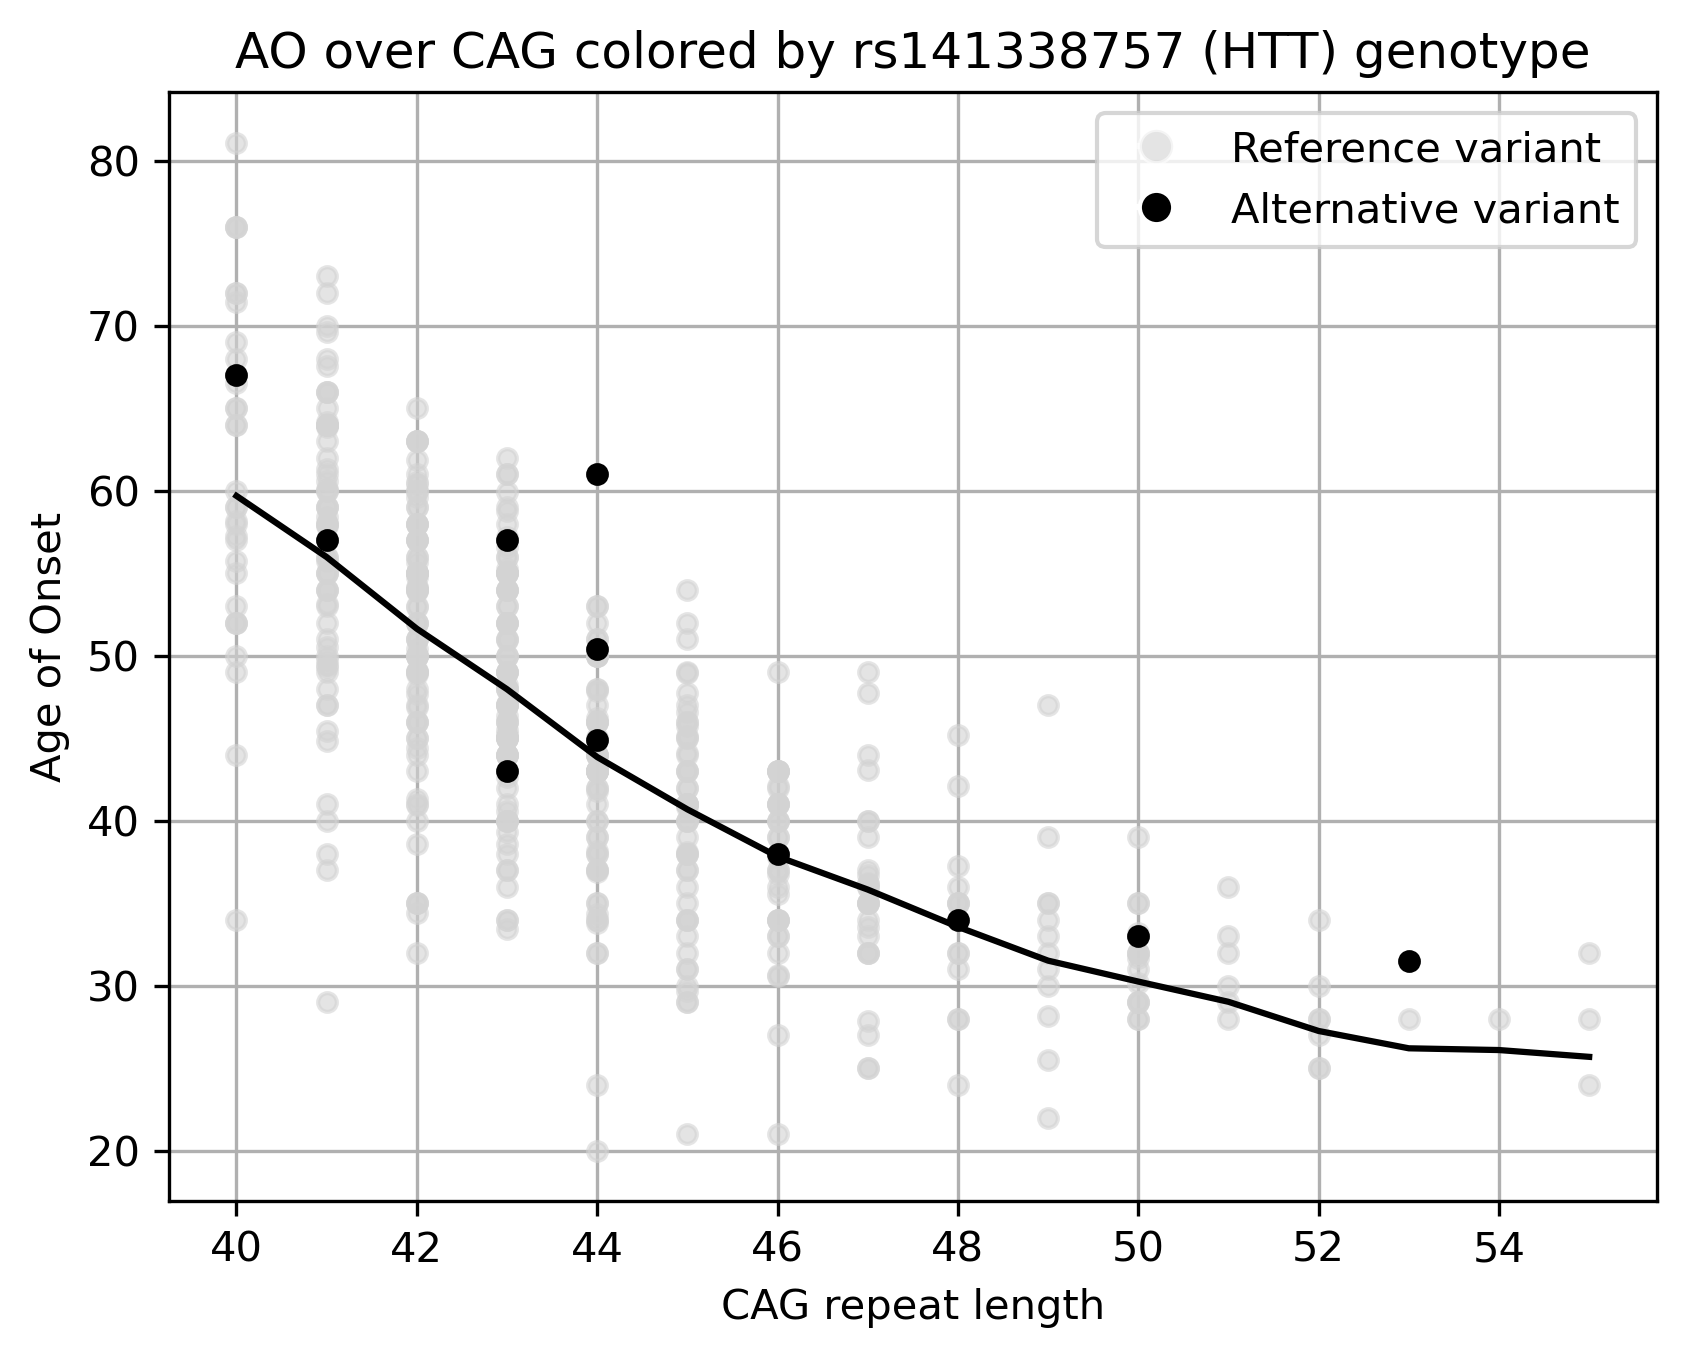

In [71]:
gene = 'HTT'
SNP2represent = 'rs141338757'

fig = variant_AOvsCAG(SNP2represent, gene, feature_names)
fig.savefig(results_dir + '{}_{}.png'.format(gene, SNP2represent))

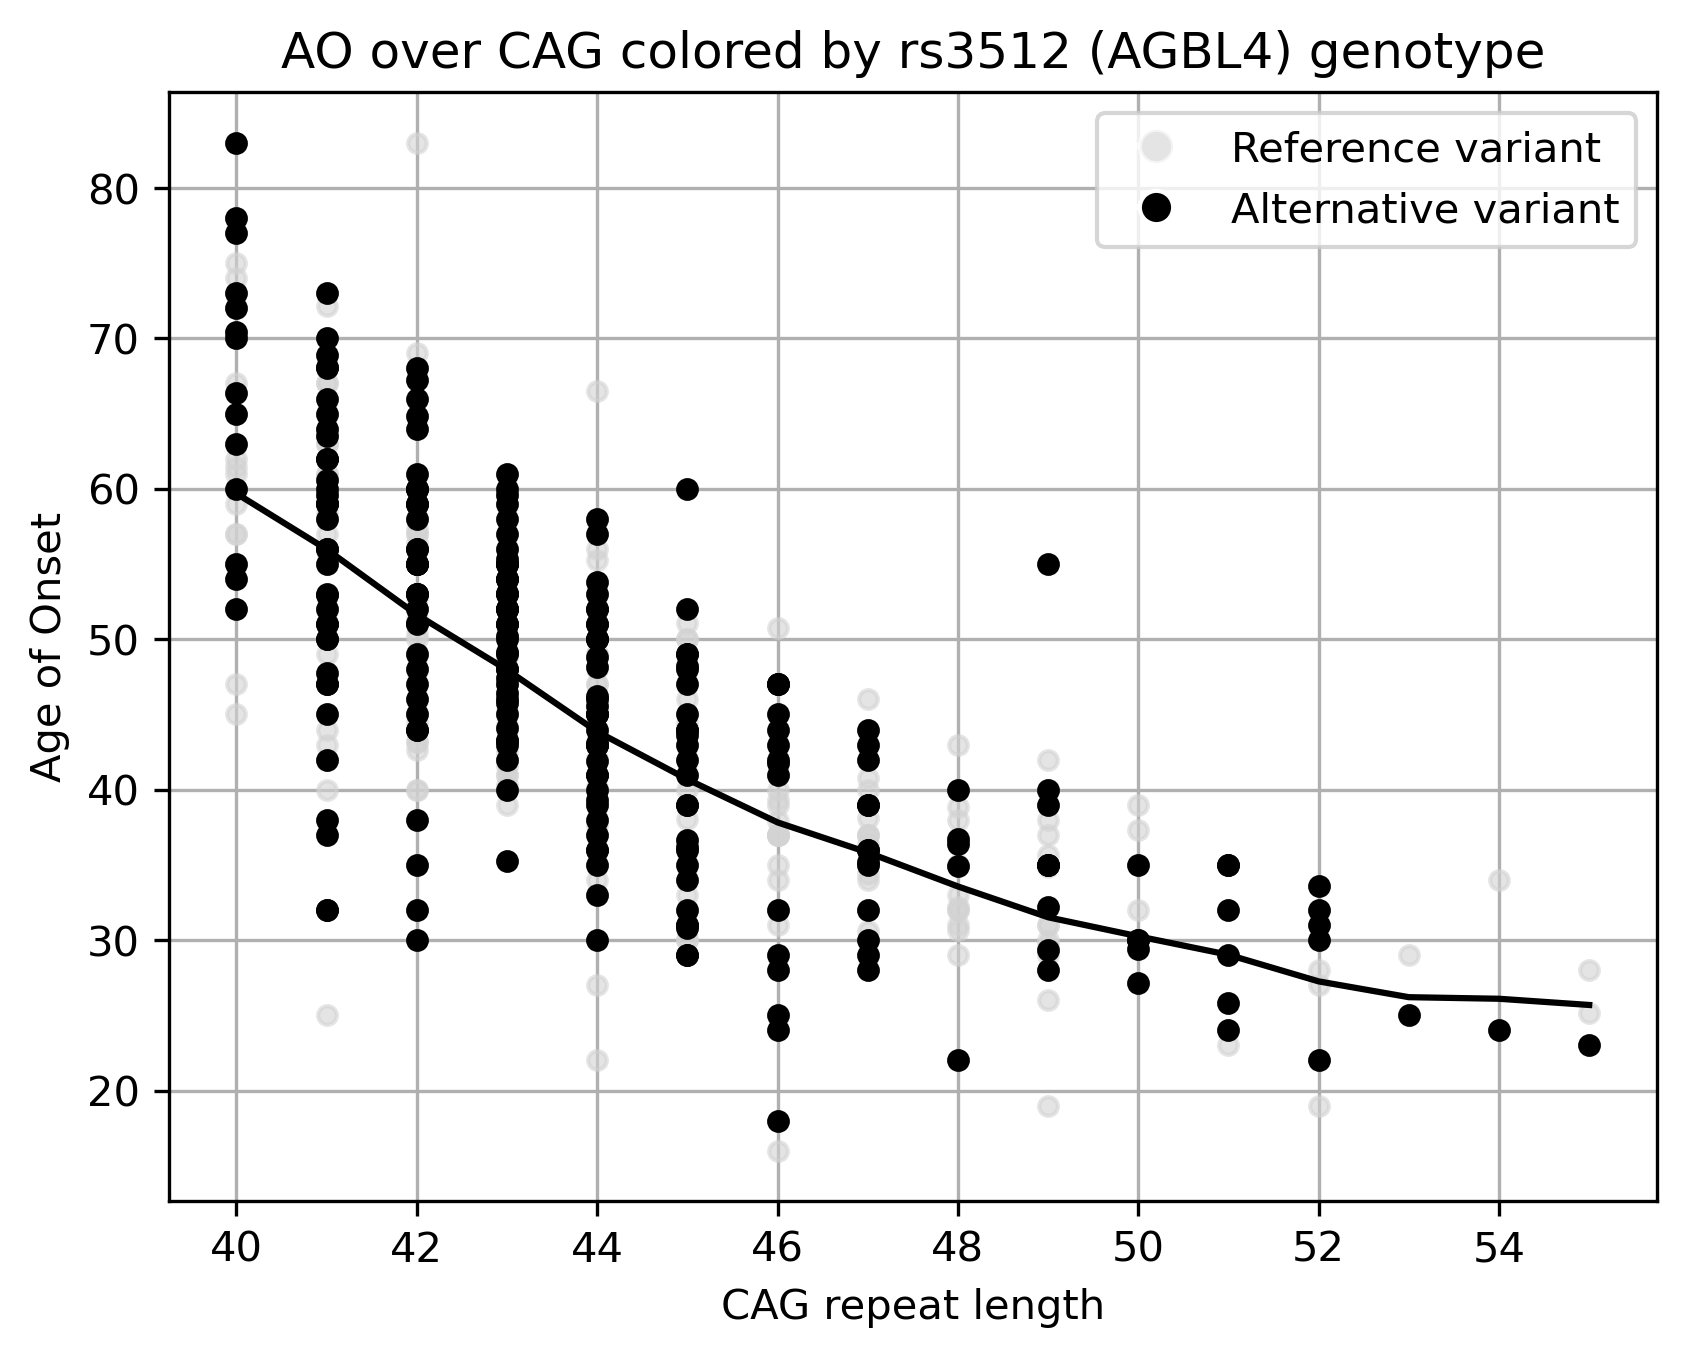

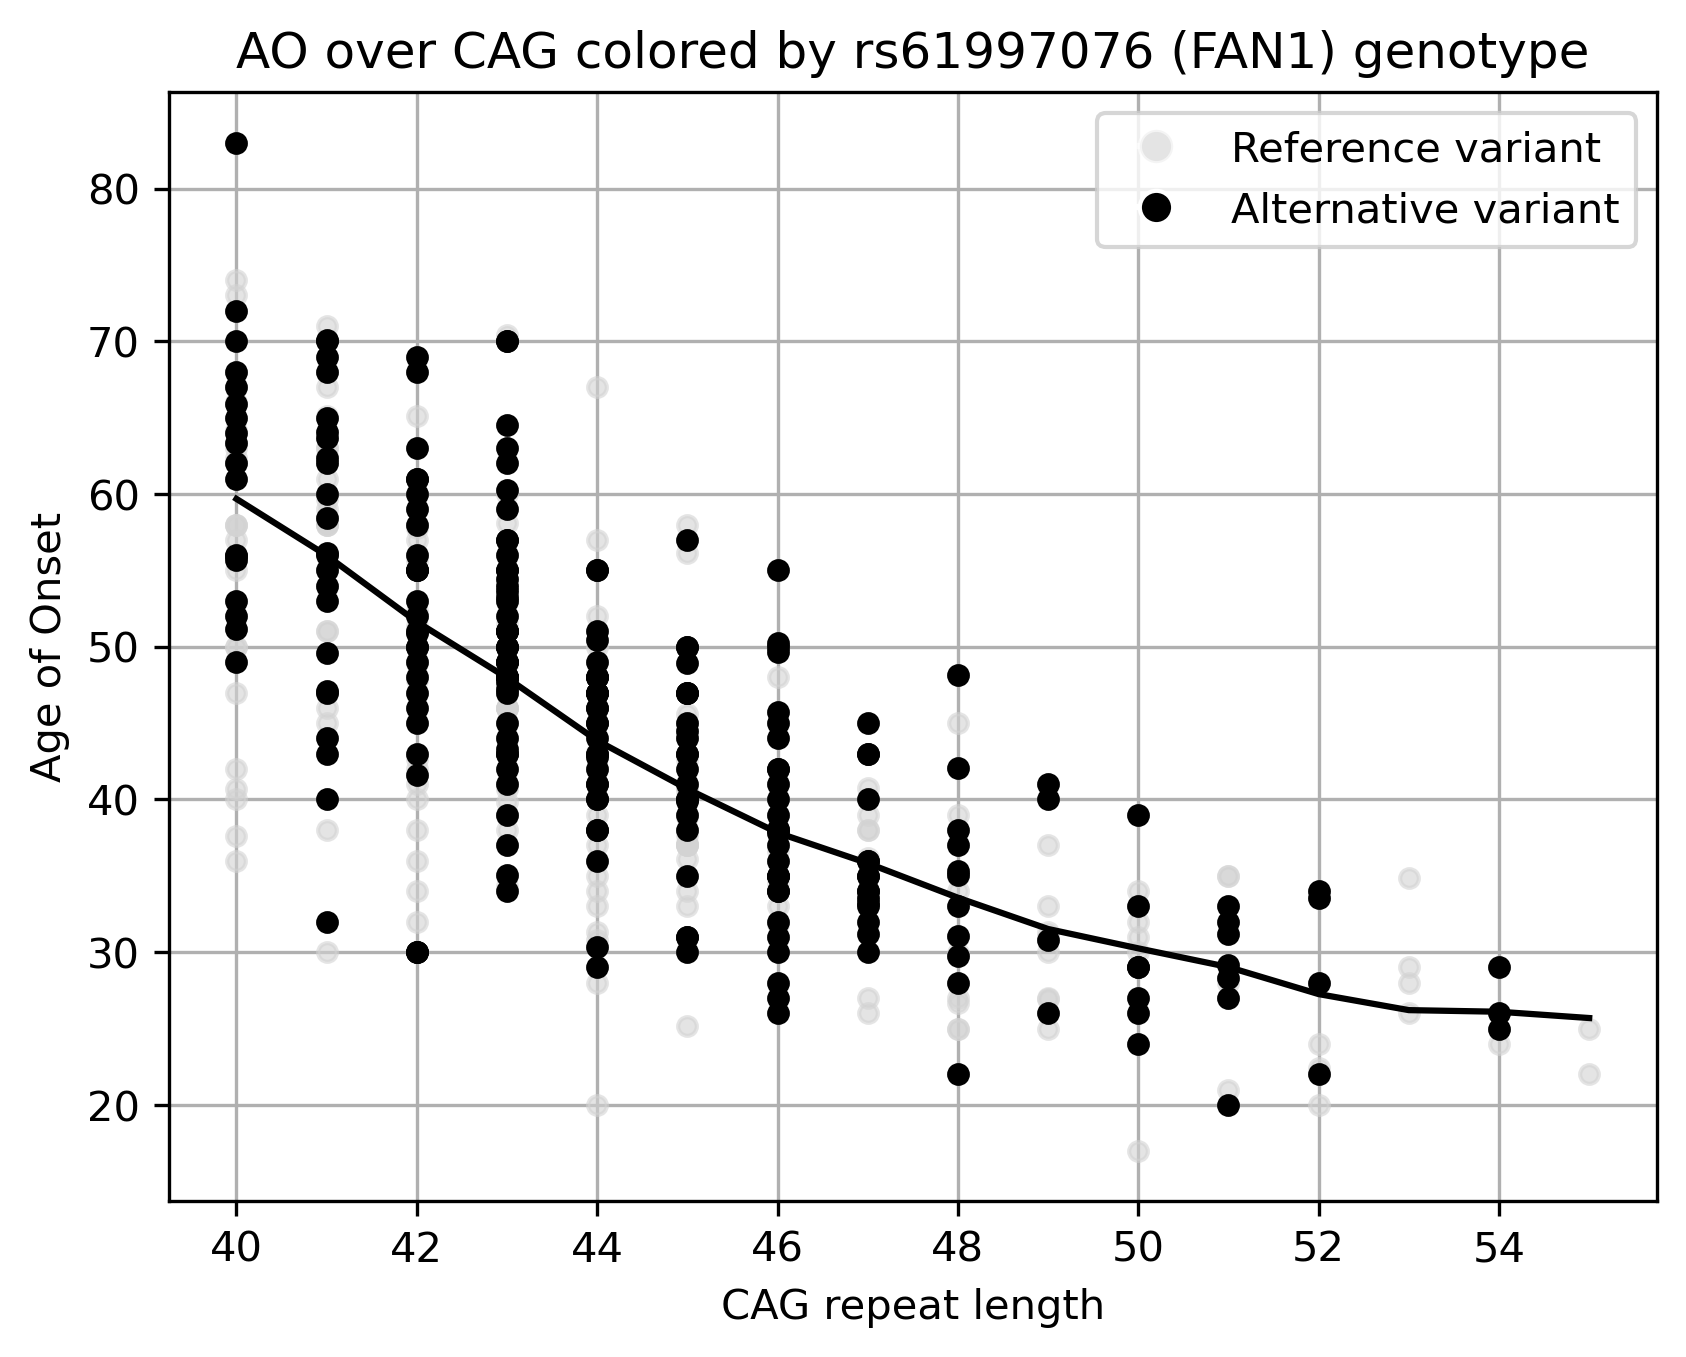

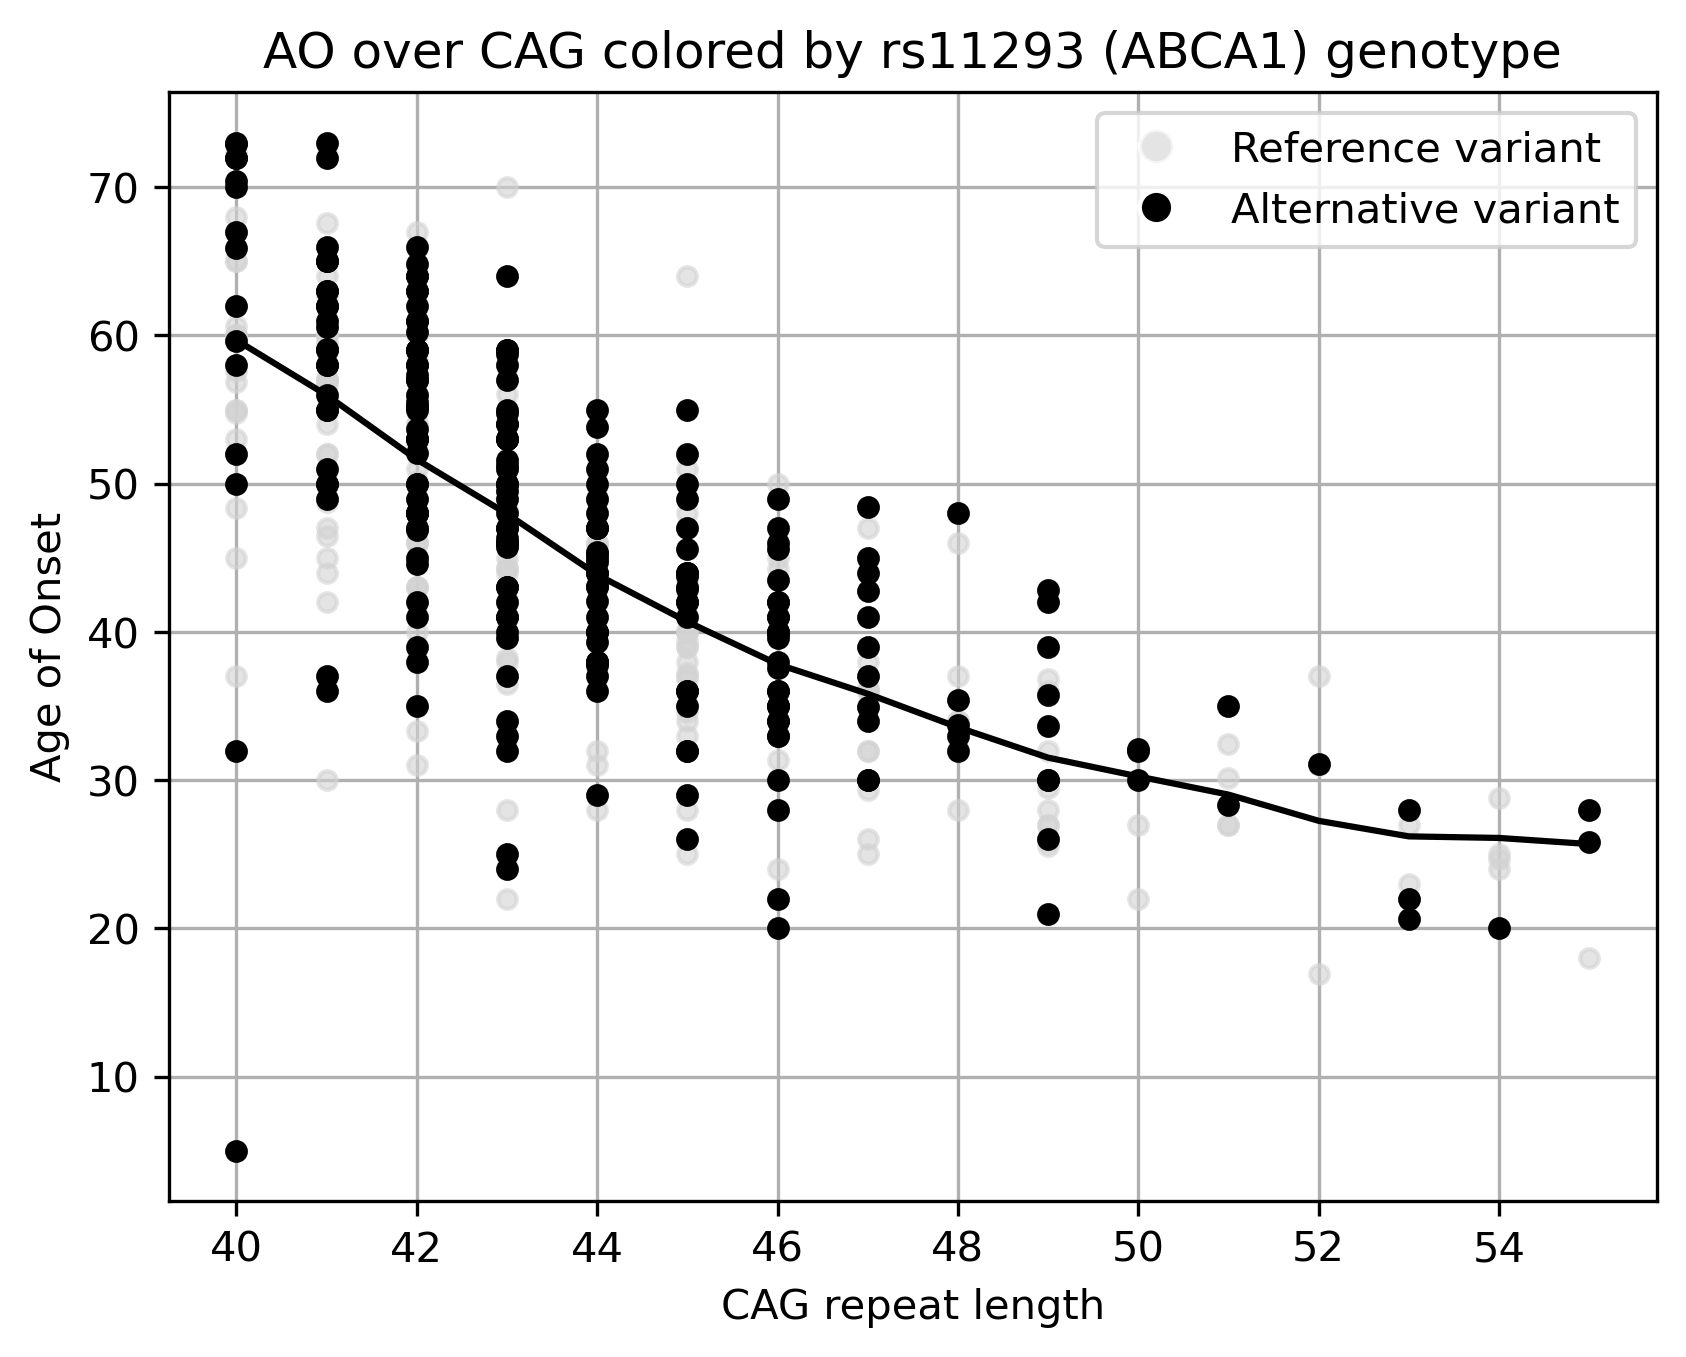

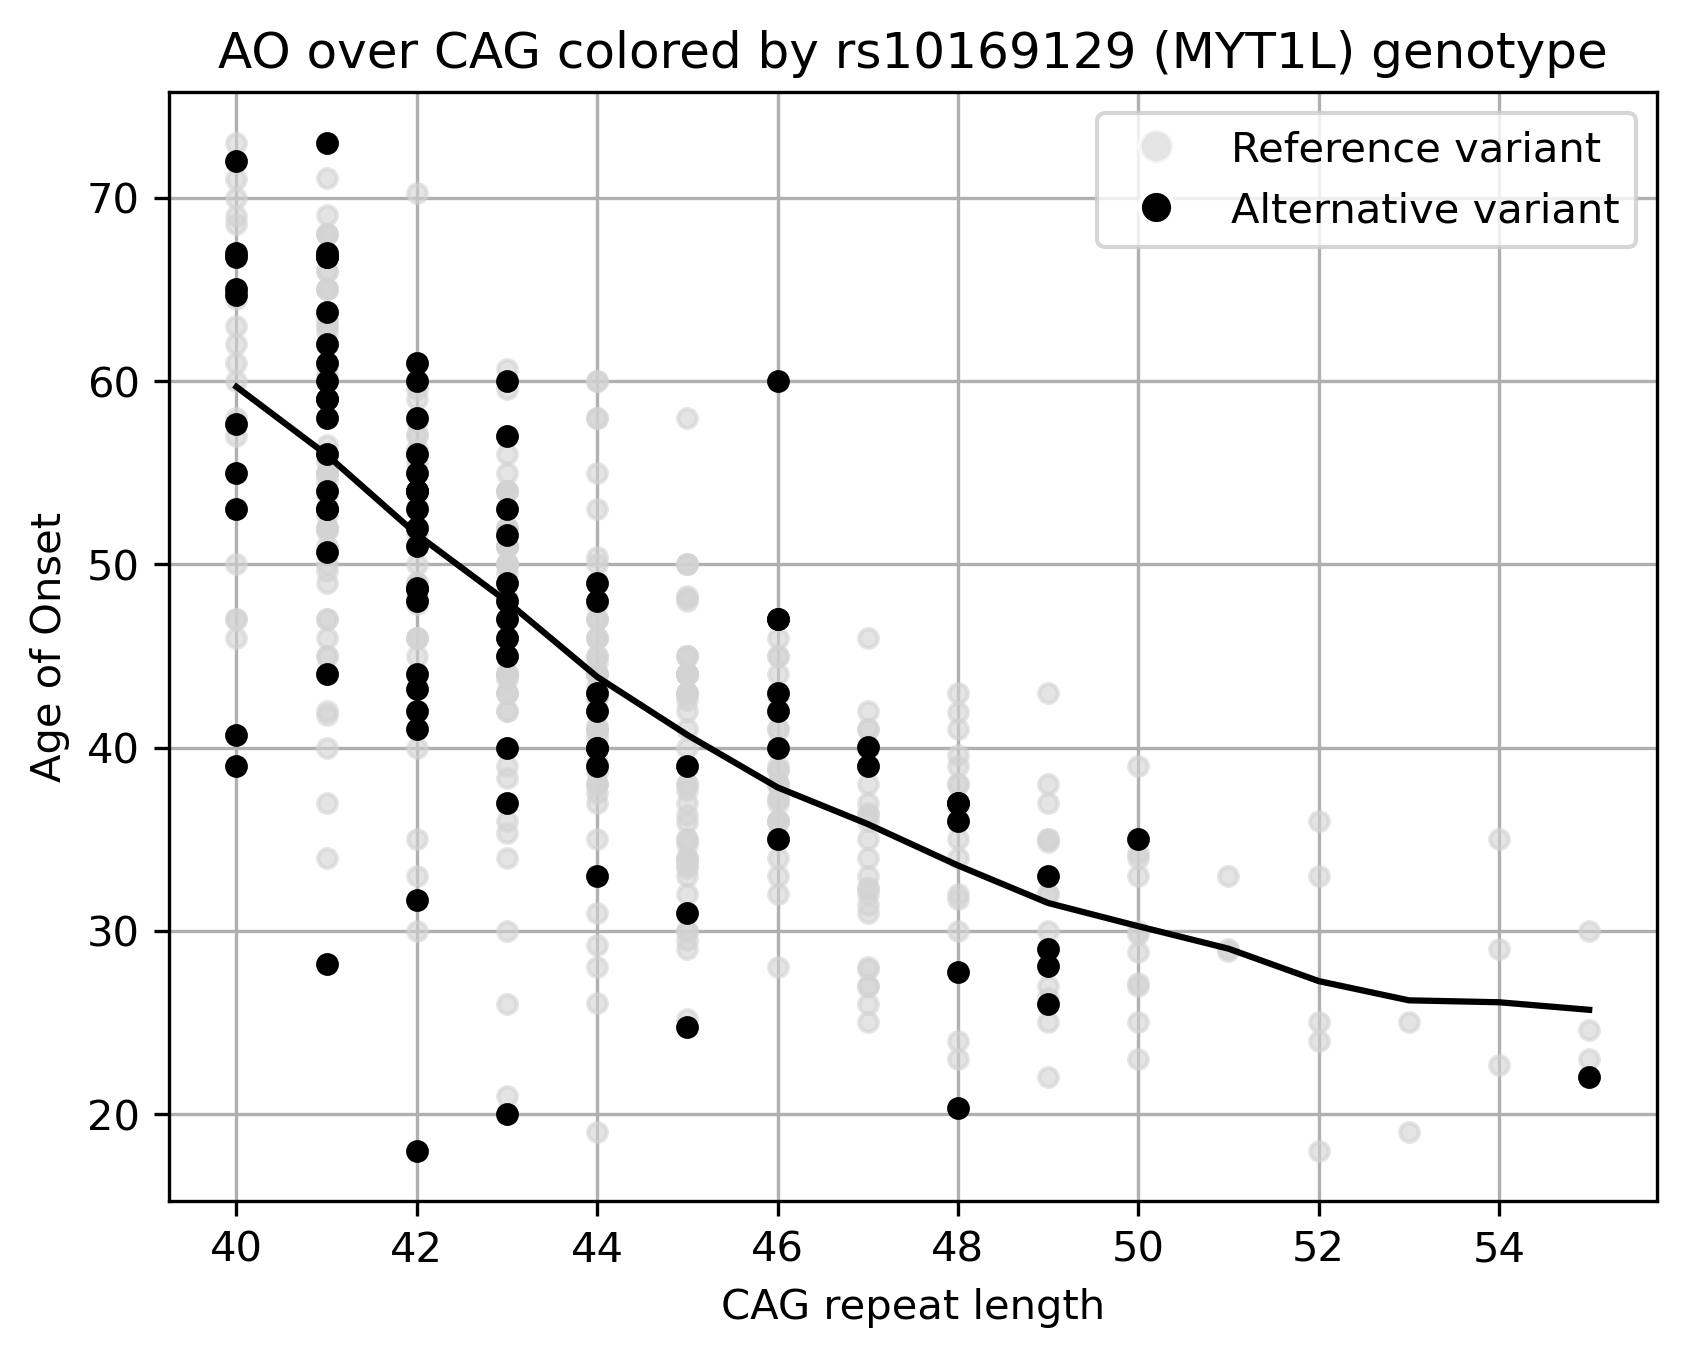

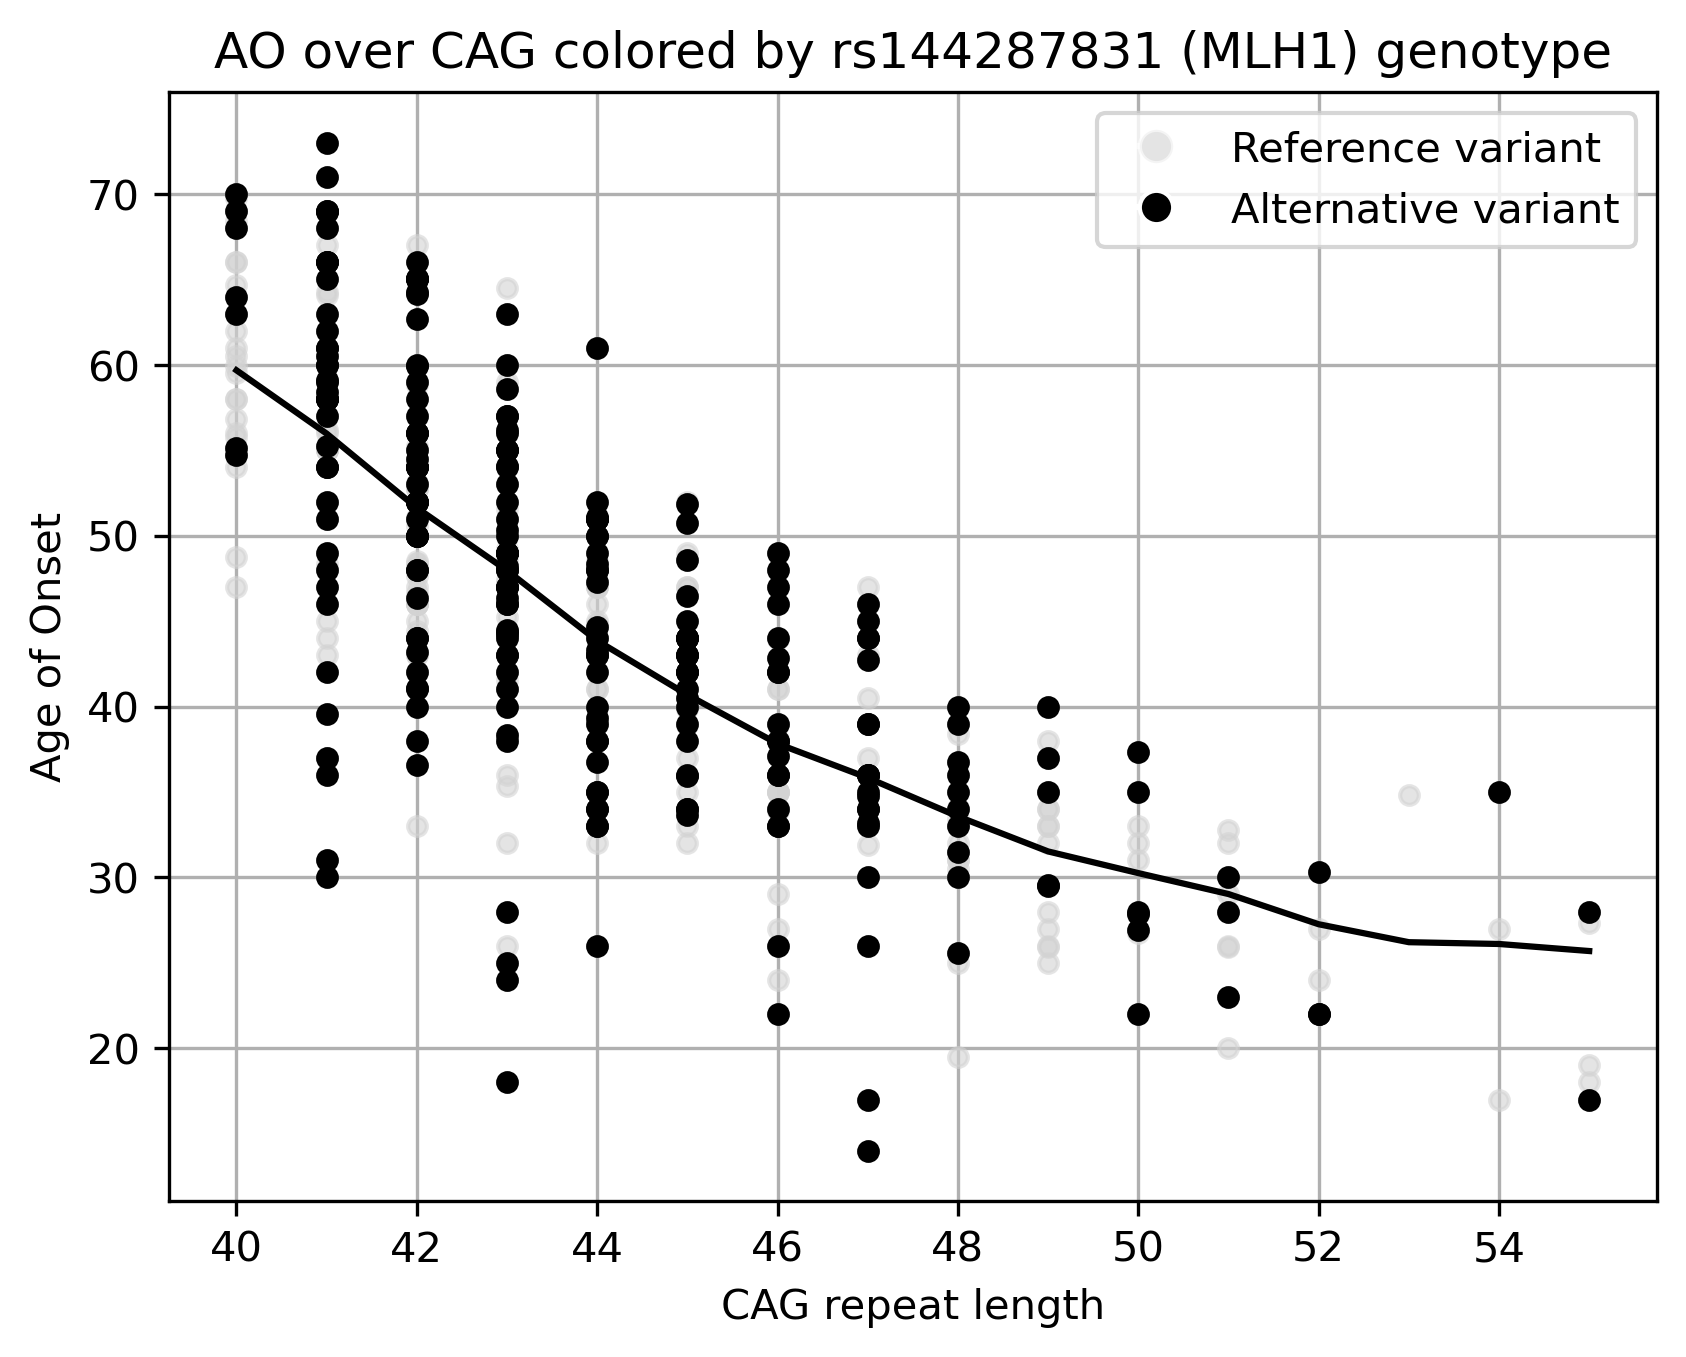

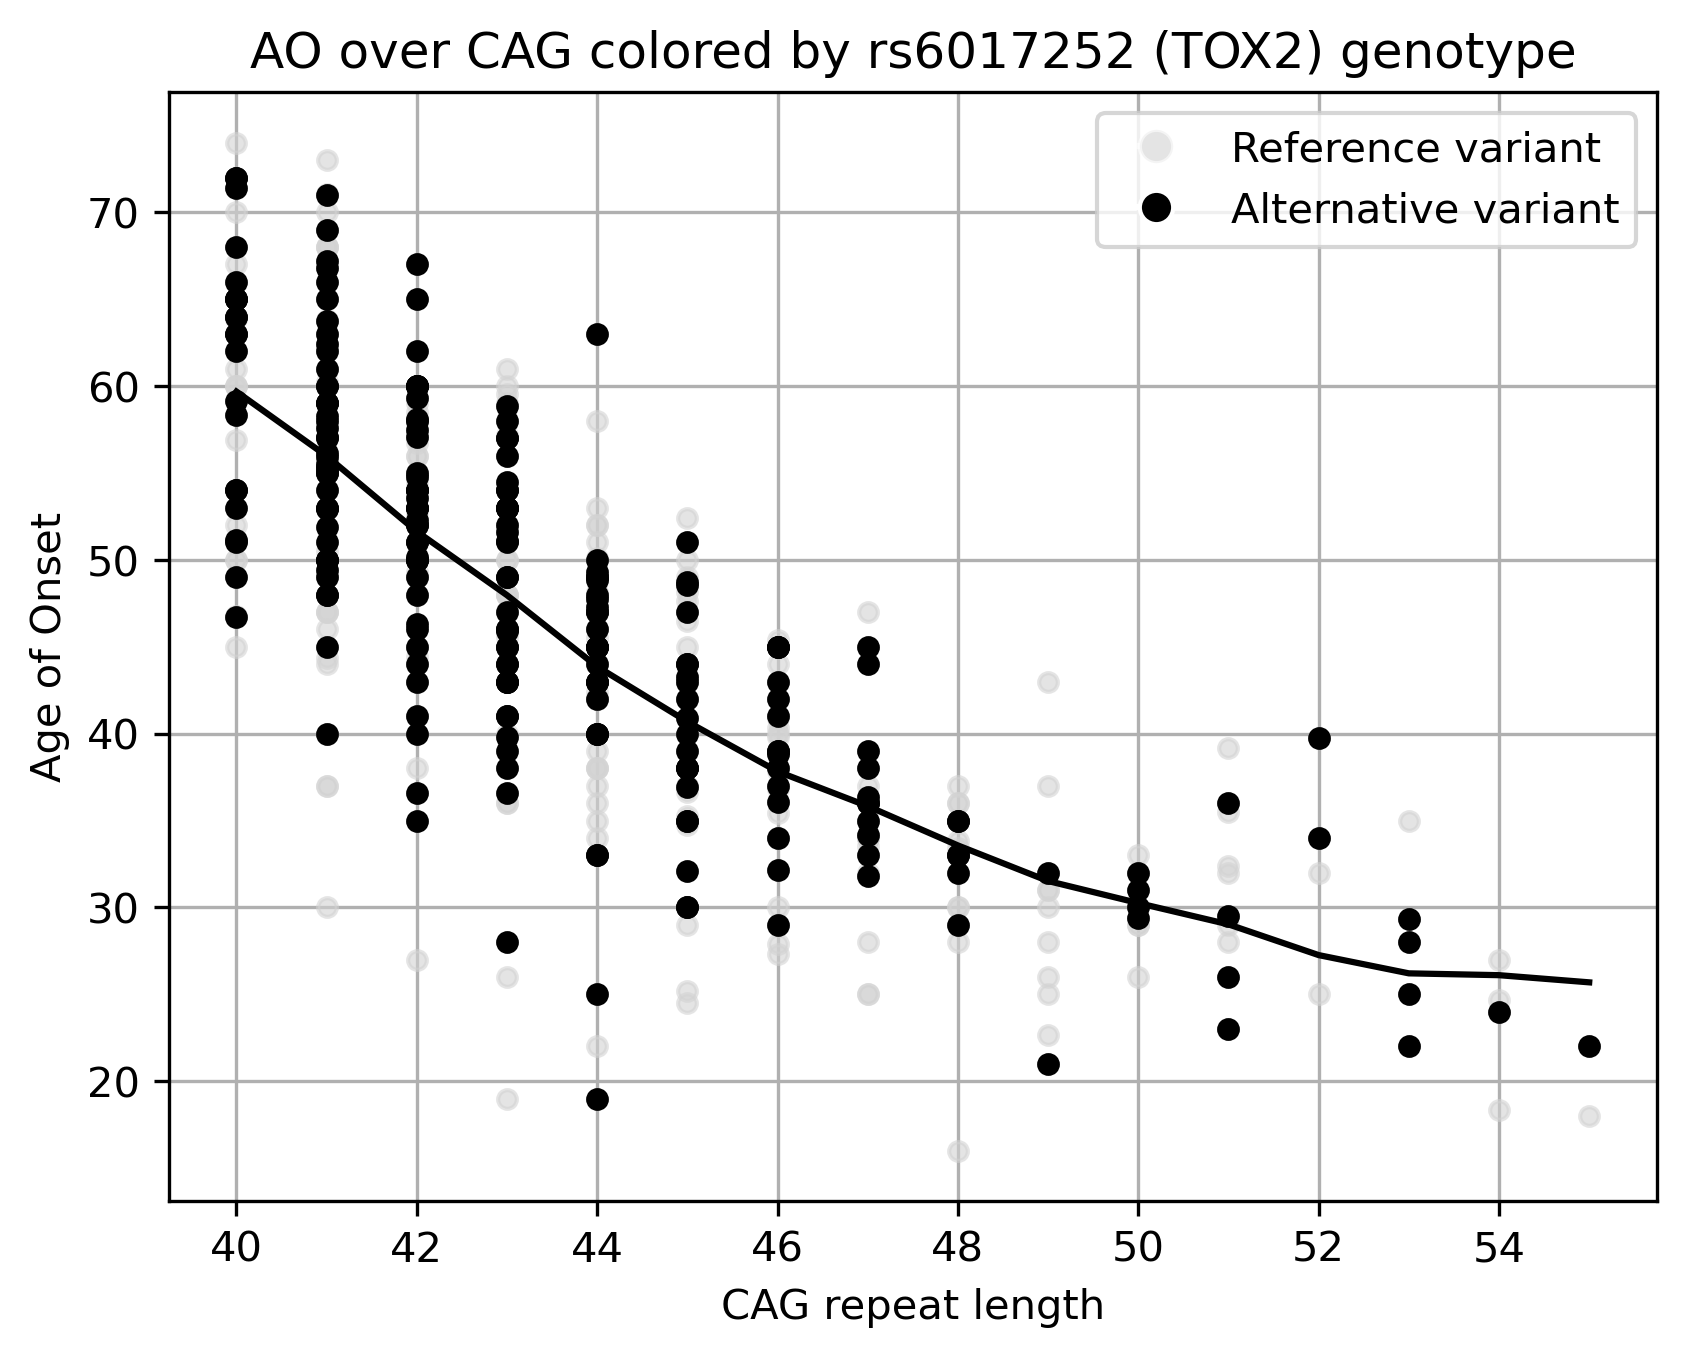

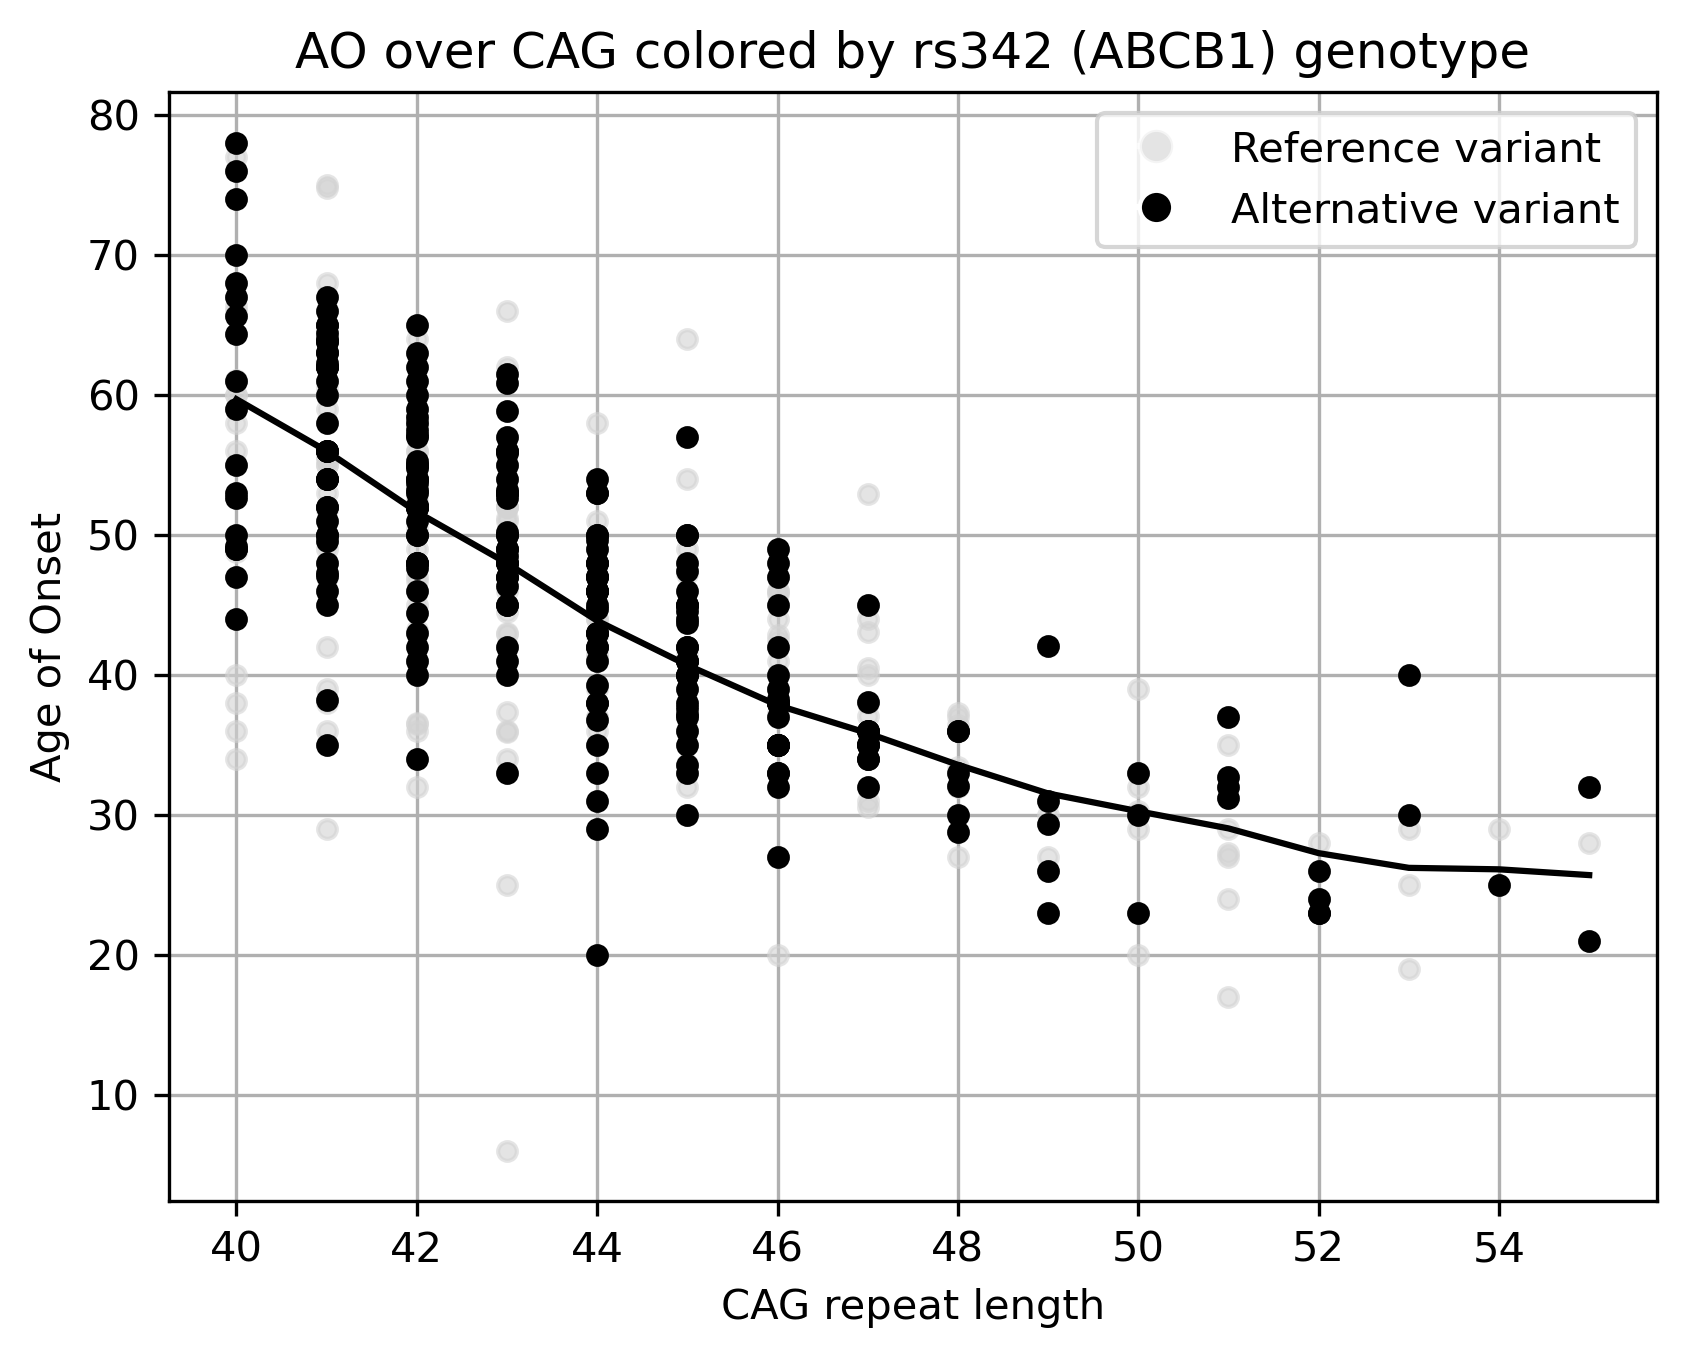

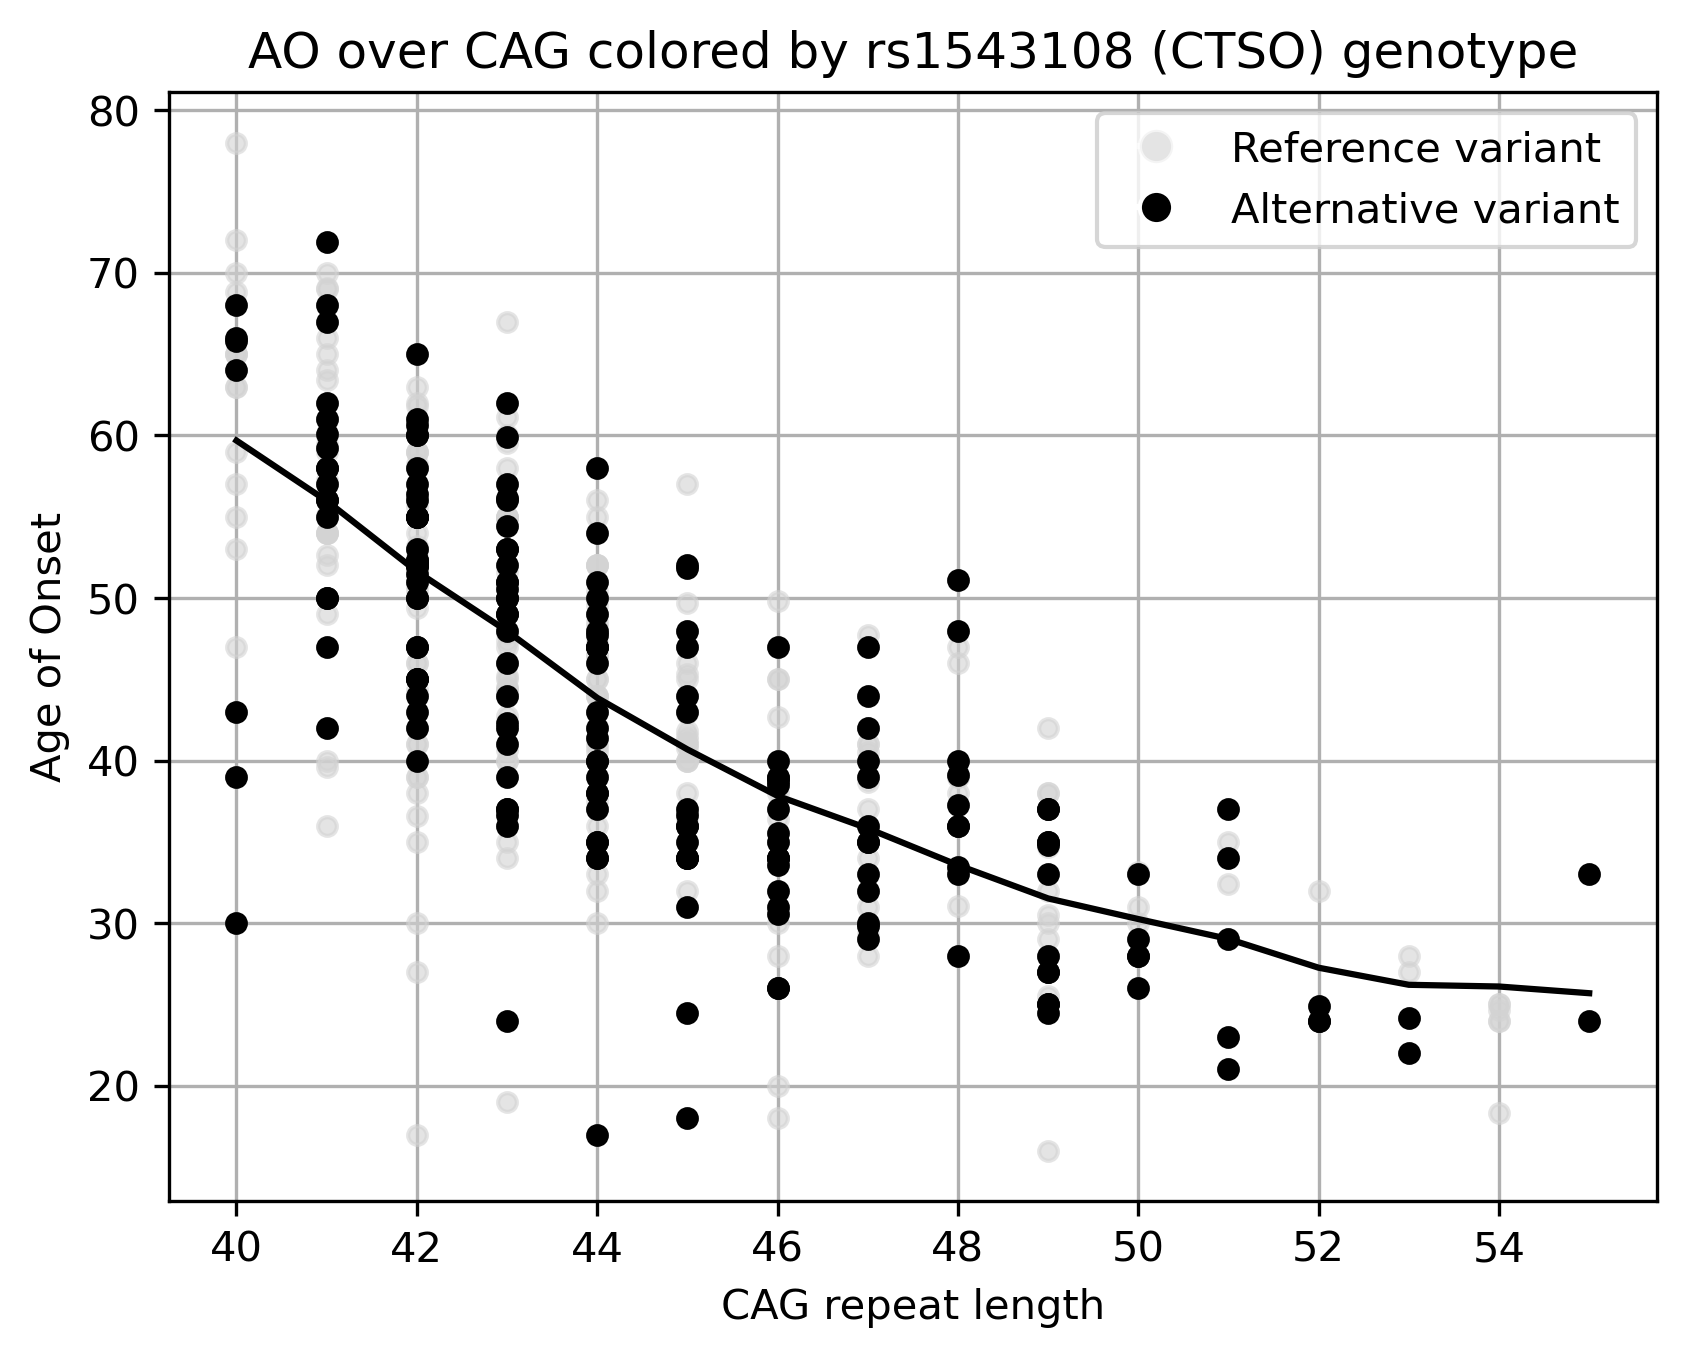

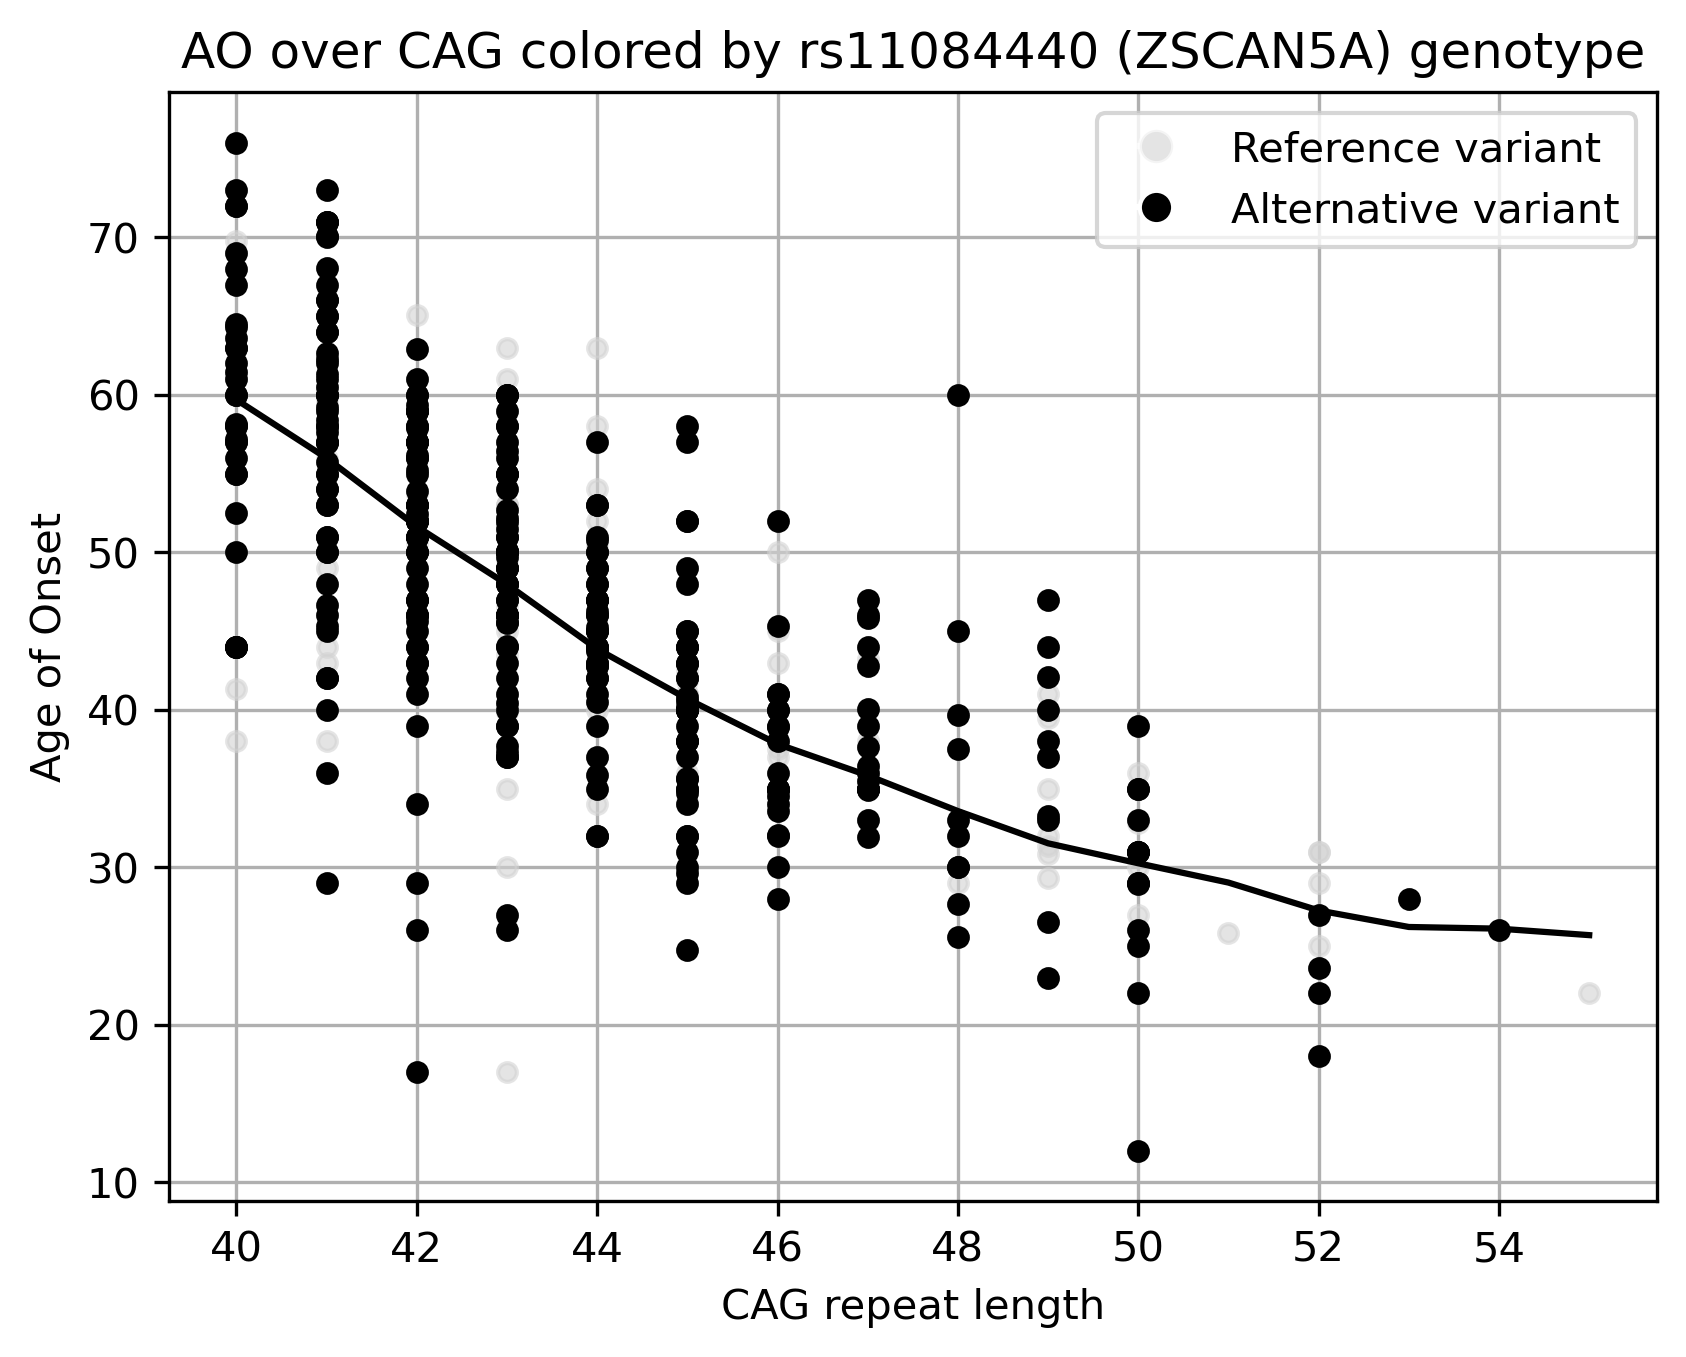

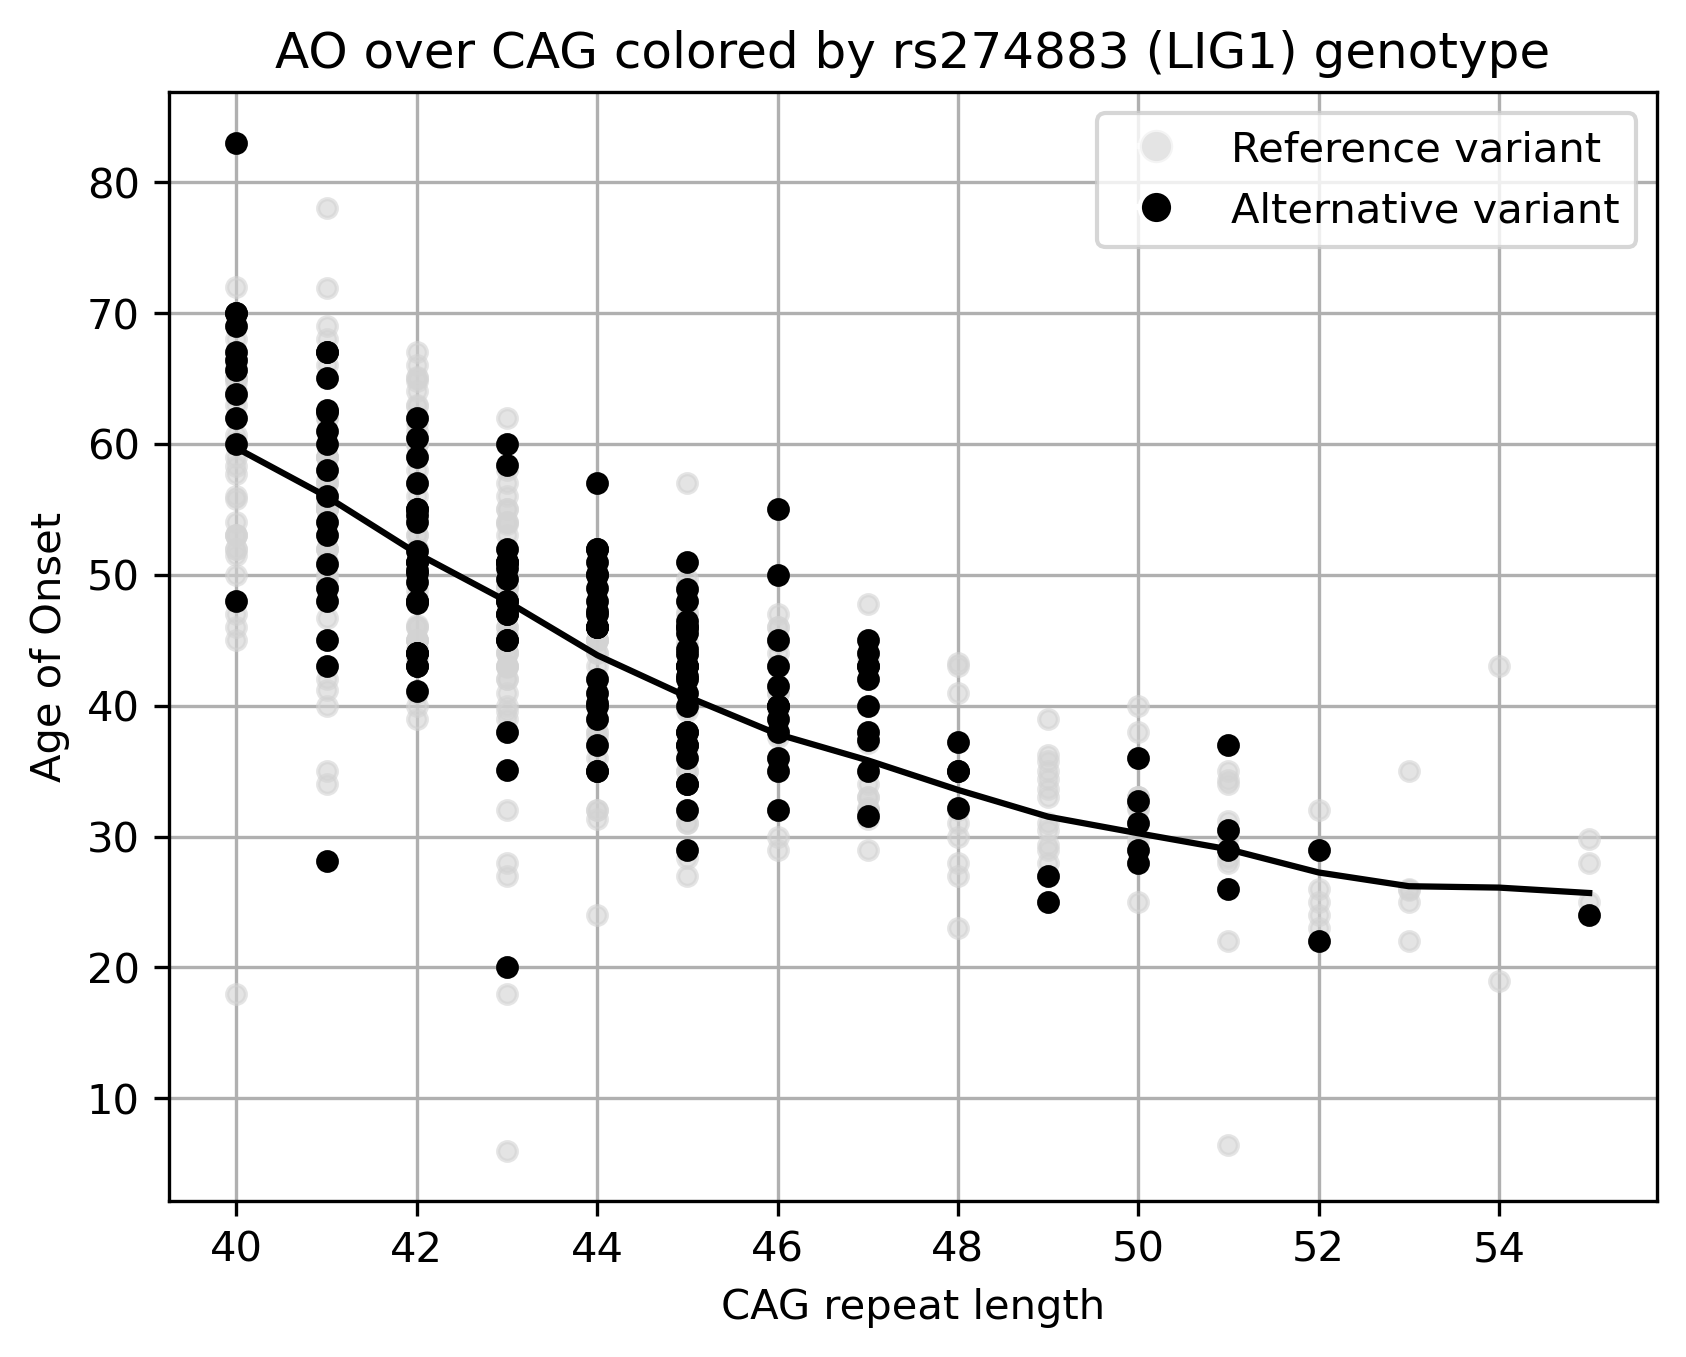

In [140]:
for i in range(10):
    
    # Get SNP to plot from ranked df
    row = rankedSNPs.iloc[i]
    gene = row['Gene']
    SNP2represent = row['SNP']
    
    # Plot
    fig = variant_AOvsCAG(SNP2represent, gene, feature_names)
    fig.savefig(results_dir + '{}_{}.png'.format(gene, SNP2represent))

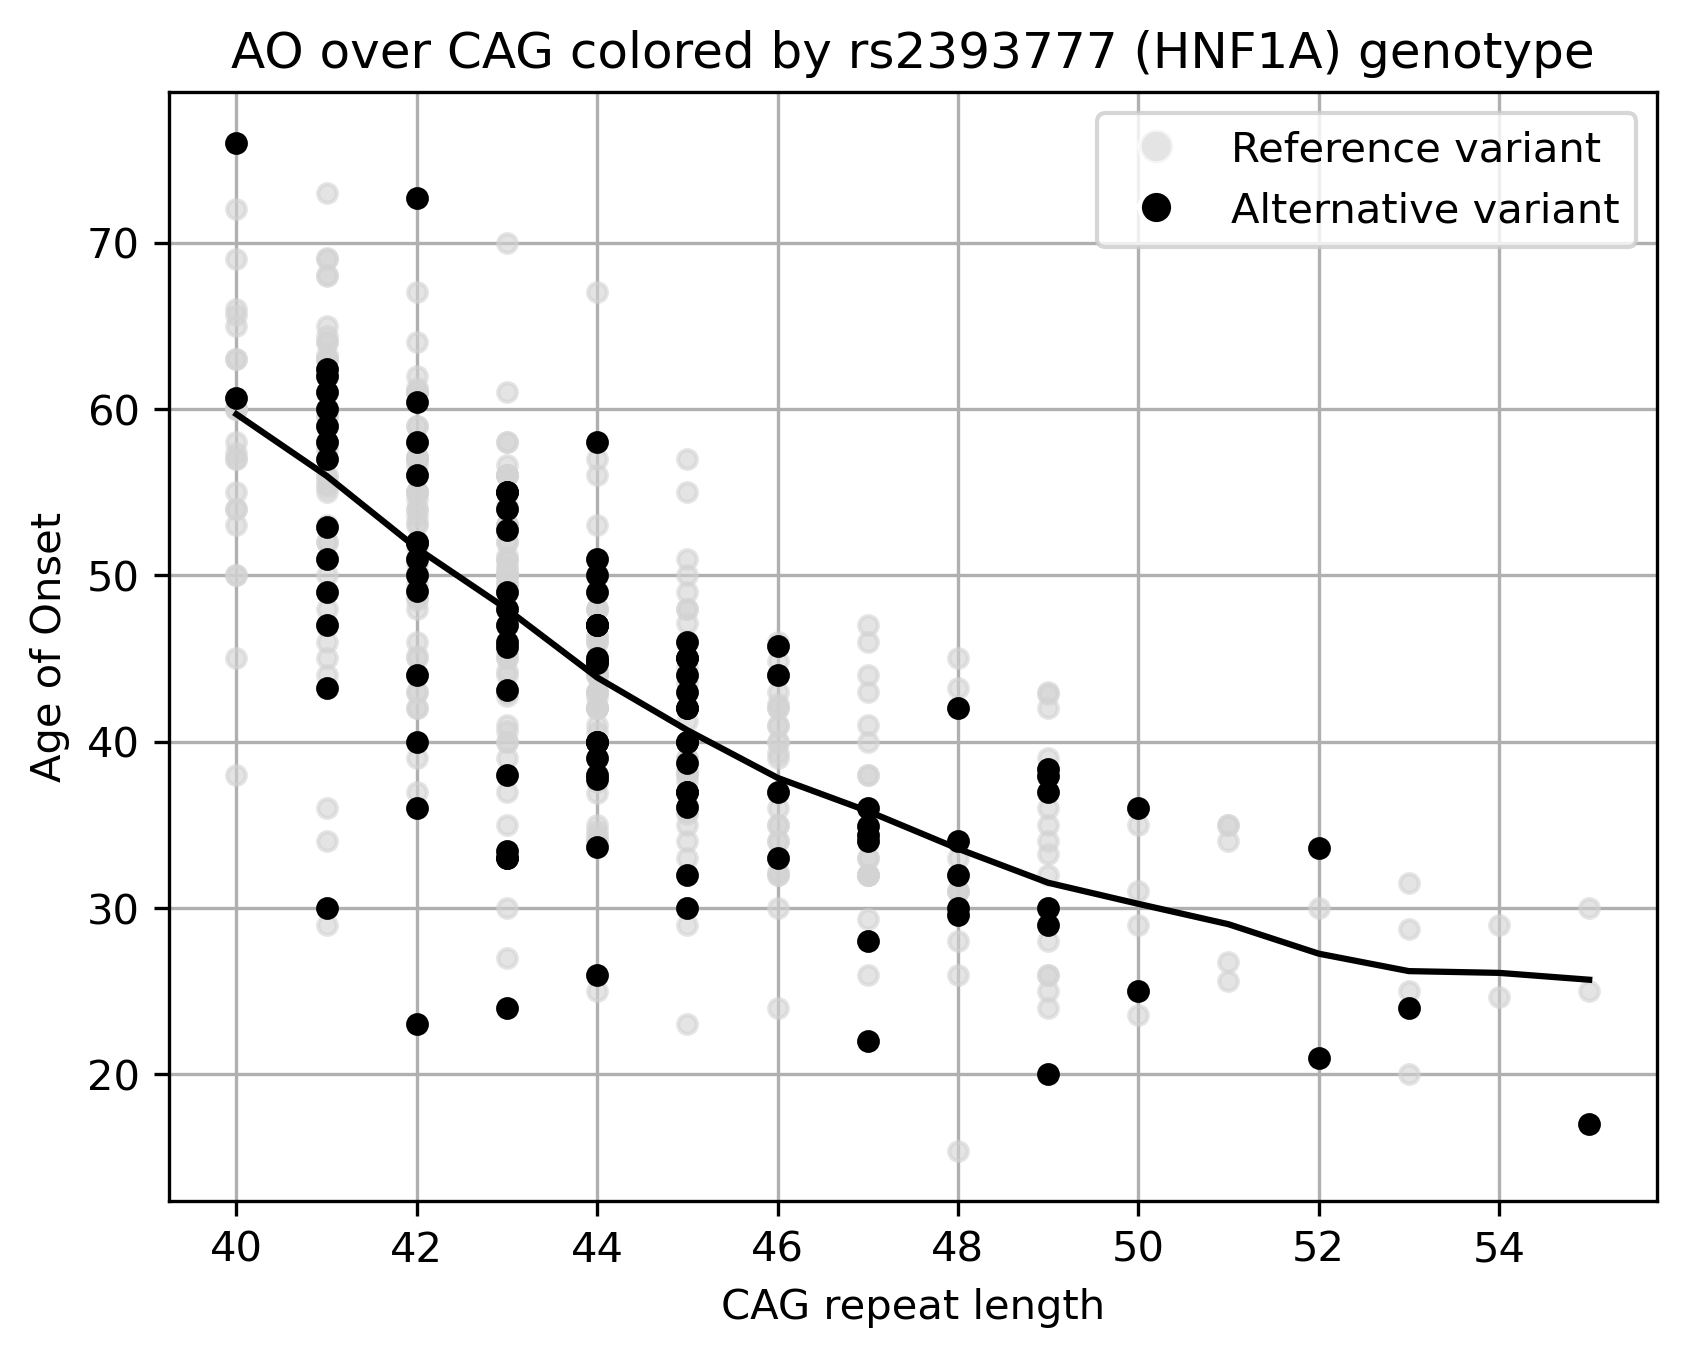

In [132]:
gene = 'HNF1A'
SNP2represent = 'rs2393777'

